In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('Restaurant_Reviews.tsv', delimiter = '\t', quoting = 3)

In [3]:
dataset.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [4]:
import re 
import nltk #stop word not relevant fro predictions (all the articles word)
nltk.download('stopwords') #download the library  
from nltk.corpus import stopwords  #import the library 
from nltk.stem.porter import PorterStemmer  # for identify the review go or bas relevant tenses
corpus = [] #create list and add cleanup  review
for i in range(0 , 1000):
    review = re.sub('[^a-zA-Z]' , ' ' , dataset['Review'] [i])#everythings like double quotes , comas , columns convert to space 
    #capital letters convert to simple later
    review = review.lower()
    #each review into its different words
    review = review.split() 
    ps = PorterStemmer()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
    review = ' '.join(review)
    corpus.append(review)




[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/chamudikapramod/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500) 
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[ : , -1].values

In [6]:
len(X[0])

1500

In [7]:
print(y)

[1 0 0 1 1 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 1 1
 0 1 0 1 0 0 1 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 0
 0 0 0 1 1 0 0 0 0 1 0 1 0 1 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0
 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1 0 1 0 0 0 0 1 1 0 0
 0 0 1 1 0 0 1 1 1 1 1 0 0 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0 0 0 0 1
 1 0 1 1 1 1 1 0 1 0 1 0 0 1 1 1 1 0 1 1 1 0 0 0 1 0 0 1 0 1 1 0 1 0 1 0 0
 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1
 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 0 1 0 0 1 1 1 0 0 1 1 1 1 1 1 0 0 0 1 1
 0 1 1 0 0 1 0 0 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 1 1 1
 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 0 1
 1 1 0 1 1 0 1 0 0 0 1 1 1 1 0 0 0 0 1 1 0 0 1 0 1 1 0 1 0 1 1 1 1 0 1 1 0
 1 1 0 0 1 1 0 1 0 0 0 0 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 0 1 0 0 0 1 1 1 1 0
 1 0 0 1 1 1 0 0 1 1 1 0 

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, 
                                                    random_state = 0)

In [9]:
print(X_train)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [10]:
print(X_test)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [11]:
print(y_train)

[1 1 1 0 1 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 0 0 1 1 1 0 0 1 1 1 1 0 1 0 1
 1 1 0 1 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 1 1 0 0 1 1 0 1 0 0 0 1 1
 0 1 1 1 0 1 0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 1 0 0 1 0 0
 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 0 1 0 1 0 1 0 0 1 0 1 0 0 1 0 1 0
 0 0 1 1 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 1 1 1 1 0
 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1
 0 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1 0 1 1 1 0 0 1 1 1 1 1 0 1 1 0 0 0 1 0 0 1
 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 1 0 1 0 1 1 0 1 1 0
 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 1 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0
 1 1 1 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 1 1 1 1 1 1 0 0 1 0 1 0 0 1 0 0 0 1 0
 0 1 1 1 1 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1
 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 0 0 0 1 1 1
 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 1 1 0 0 1 1 0 0 1 0 0 0 1 0 1 0
 0 1 0 1 0 1 1 0 0 1 0 1 

In [12]:
print(y_test)

[0 0 0 0 0 0 1 0 0 1 1 1 0 1 1 1 0 0 0 1 0 1 1 0 0 1 1 1 1 0 1 1 1 1 1 0 0
 0 0 1 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 1 1 1 1
 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 1 0 1 1 0 1 1
 1 0 0 1 0 1 1 1 1 1 0 1 0 0 0 1 0 0 1 0 1 0 0 1 1 1 1 1 0 1 1 1 0 0 0 0 1
 1 1 1 1 1 1 0 0 1 1 1 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 1 0 1 1 0 0 0 0
 1 0 1 0 1 1 0 0 0 1 0 1 1 0 1]


In [13]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [14]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred) , 1) , 
                      y_test.reshape(len(y_test) , 1)),1))

[[1 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 0]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]

In [15]:
from sklearn.metrics import confusion_matrix , accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[55 42]
 [12 91]]


0.73

In [16]:
new_review = 'I love this restaurant so much'
new_review = re.sub('[^a-zA-Z]', ' ', new_review)
new_review = new_review.lower()
new_review = new_review.split()
ps = PorterStemmer()
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')
new_review = [ps.stem(word) for word in new_review if not word in set(all_stopwords)]
new_review = ' '.join(new_review)
new_corpus = [new_review]
new_X_test = cv.transform(new_corpus).toarray()
new_y_pred = classifier.predict(new_X_test)
print(new_y_pred)

[1]


In [17]:
new_review = 'I hate this restaurant so much'
new_review = re.sub('[^a-zA-Z]', ' ', new_review)
new_review = new_review.lower()
new_review = new_review.split()
ps = PorterStemmer()
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')
new_review = [ps.stem(word) for word in new_review if not word in set(all_stopwords)]
new_review = ' '.join(new_review)
new_corpus = [new_review]
new_X_test = cv.transform(new_corpus).toarray()
new_y_pred = classifier.predict(new_X_test)
print(new_y_pred)

[0]


In [18]:
y_pred = classifier.predict(X_test)


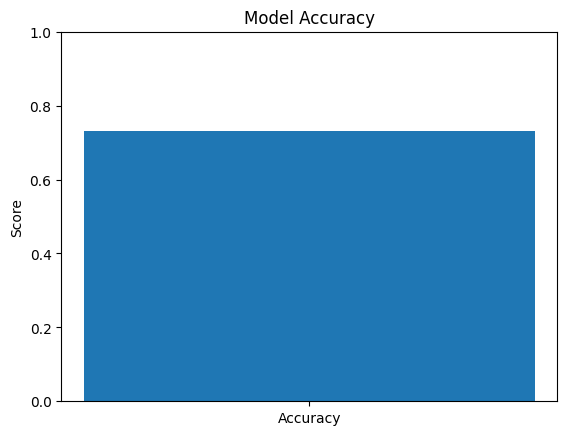

In [19]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

acc = accuracy_score(y_test, y_pred)

plt.figure()
plt.bar(["Accuracy"], [acc])
plt.ylim(0, 1)
plt.title("Model Accuracy")
plt.ylabel("Score")
plt.show()


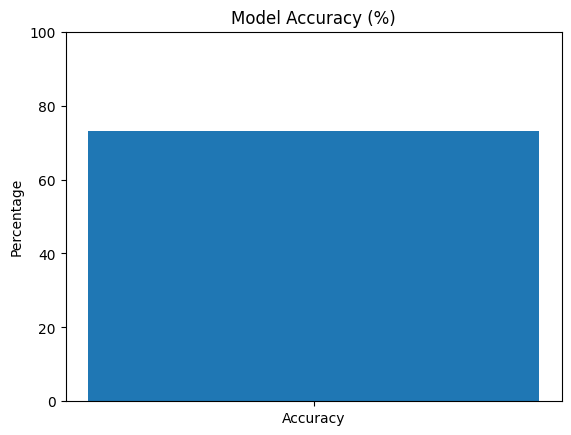

In [20]:
acc_percent = acc * 100

plt.figure()
plt.bar(["Accuracy"], [acc_percent])
plt.ylim(0, 100)
plt.title("Model Accuracy (%)")
plt.ylabel("Percentage")
plt.show()


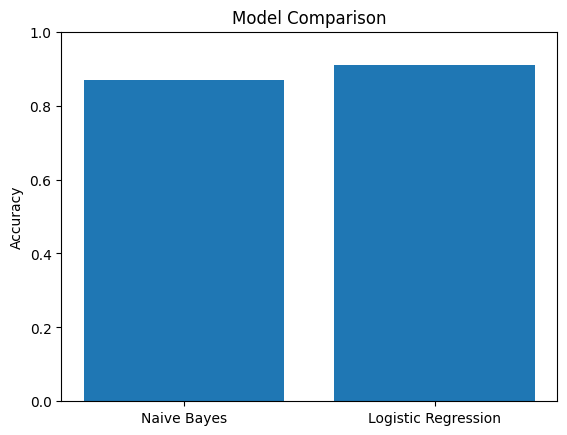

In [22]:
models = ["Naive Bayes", "Logistic Regression"]
scores = [0.87, 0.91]  # replace with real values

plt.figure()
plt.bar(models, scores)
plt.ylim(0,1)
plt.title("Model Comparison")
plt.ylabel("Accuracy")
plt.show()


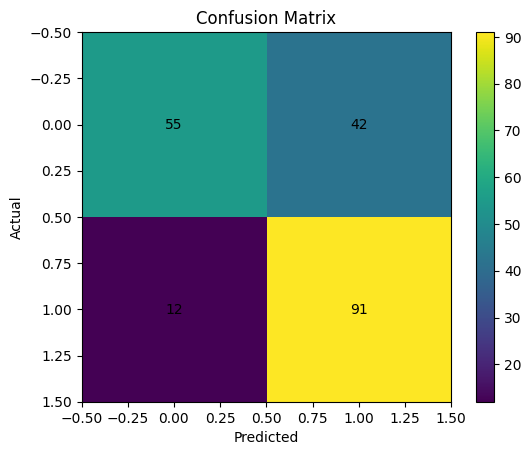

In [23]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure()
plt.imshow(cm)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.colorbar()

for i in range(len(cm)):
    for j in range(len(cm)):
        plt.text(j, i, cm[i][j], ha="center", va="center")

plt.show()


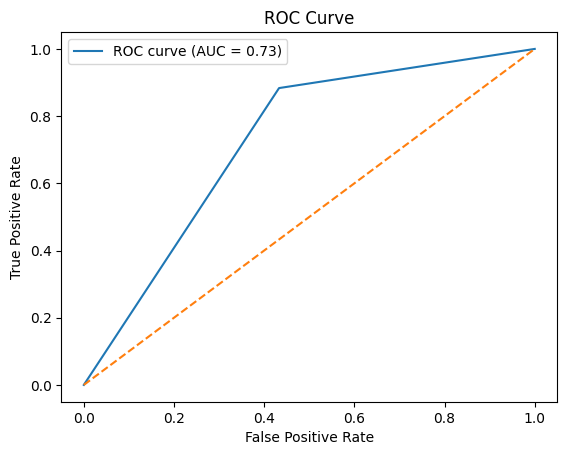

In [24]:
from sklearn.metrics import roc_curve, auc

y_prob = classifier.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label="ROC curve (AUC = %0.2f)" % roc_auc)
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


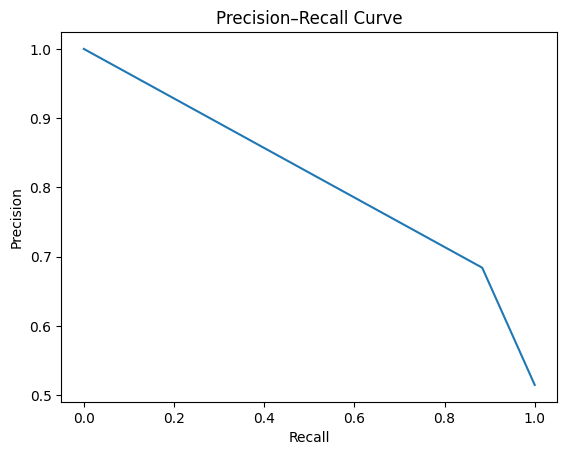

In [25]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

plt.figure()
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve")
plt.show()


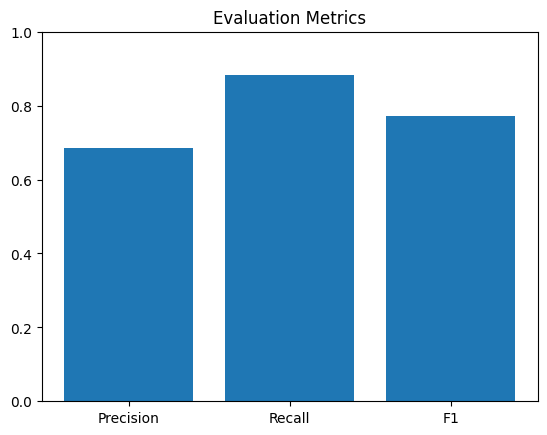

In [26]:
from sklearn.metrics import precision_score, recall_score, f1_score

p = precision_score(y_test, y_pred)
r = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

scores = [p, r, f1]
labels = ["Precision", "Recall", "F1"]

plt.figure()
plt.bar(labels, scores)
plt.ylim(0,1)
plt.title("Evaluation Metrics")
plt.show()


In [27]:
from sklearn.metrics import roc_auc_score
print("AUC Score:", roc_auc_score(y_test, y_prob))


AUC Score: 0.7252527274547093


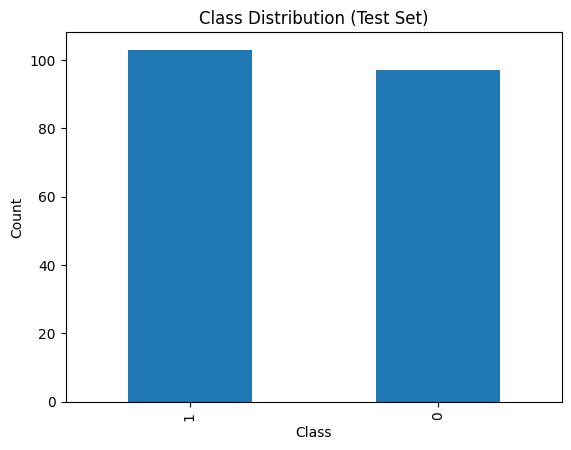

In [29]:
import matplotlib.pyplot as plt
import pandas as pd

pd.Series(y_test).value_counts().plot(kind="bar")
plt.title("Class Distribution (Test Set)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


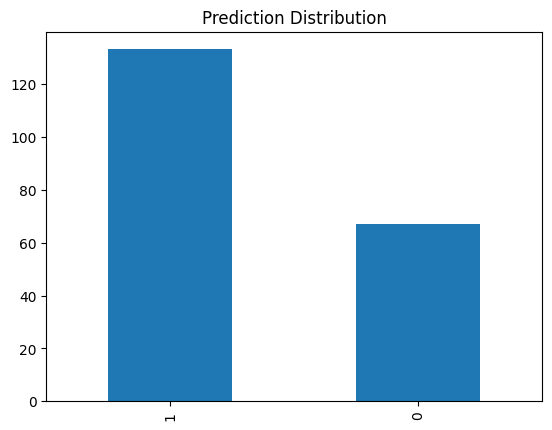

In [30]:
pd.Series(y_pred).value_counts().plot(kind="bar")
plt.title("Prediction Distribution")
plt.show()


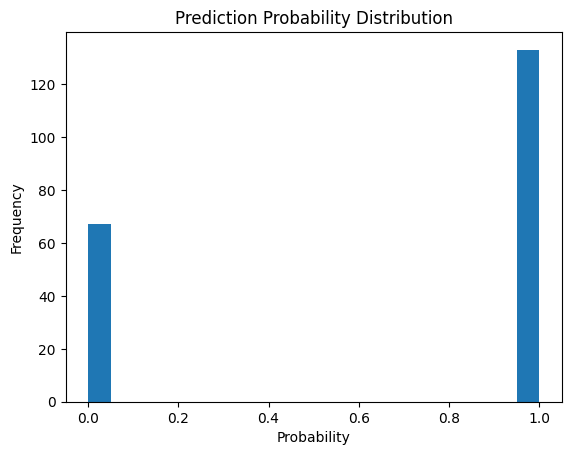

In [31]:
y_prob = classifier.predict_proba(X_test)[:,1]

plt.figure()
plt.hist(y_prob, bins=20)
plt.title("Prediction Probability Distribution")
plt.xlabel("Probability")
plt.ylabel("Frequency")
plt.show()


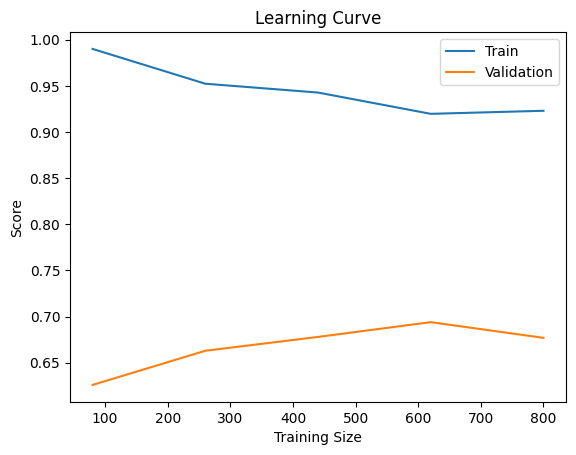

In [32]:
from sklearn.model_selection import learning_curve
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(
    classifier, X, y, cv=5
)

plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1))
plt.plot(train_sizes, np.mean(test_scores, axis=1))
plt.title("Learning Curve")
plt.xlabel("Training Size")
plt.ylabel("Score")
plt.legend(["Train","Validation"])
plt.show()


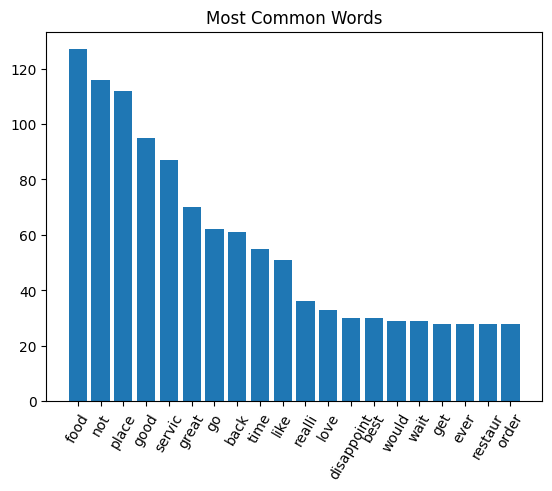

In [33]:
from collections import Counter

all_words = " ".join(corpus).split()
common = Counter(all_words).most_common(20)

words, counts = zip(*common)

plt.figure()
plt.bar(words, counts)
plt.xticks(rotation=60)
plt.title("Most Common Words")
plt.show()


In [34]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


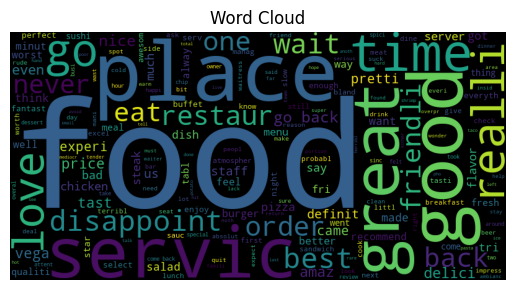

In [36]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(corpus)

wc = WordCloud(width=800, height=400).generate(text)

plt.figure()
plt.imshow(wc)
plt.axis("off")
plt.title("Word Cloud")
plt.show()
